<a href="https://colab.research.google.com/github/FranziskoB/Analise_Fatorial_PCA/blob/main/Py_Analise_Fatorial_PCA_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises fatoriais e PCA

Utilizando uma base de dados sobre venda de casas, o objetivo da análise é criar um ranking dessas casas.



##Importando bibliotecas

In [ ]:
!pip install spicy
!pip install factor_analyzer
!pip install pingouin

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Carregamento da base de dados

In [4]:
casas = pd.read_excel("https://github.com/FranziskoB/Analise_Fatorial_PCA/raw/main/Dados/preco_casas.xlsx")
casas.head(5)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
0,201,177,3,1,3.3,10,6.8,0.90,165432
1,196,182,4,3,1.2,11,4.1,1.42,187043
2,198,182,4,4,5.9,20,2.1,4.12,148658
3,178,166,2,3,5.9,5,0.7,4.36,123785
4,183,165,3,1,3.8,8,0.7,0.42,156470


##Informações sobre as variáveis

In [5]:
print(casas.info())
print(casas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
 8   property_value              4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB
None
       land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
count    4954.000000     4954.000000  4954.000000      4954.000000   
mean      250.131409      231.250908     3.788252         3.199839   


##Matriz de correlaçãoes

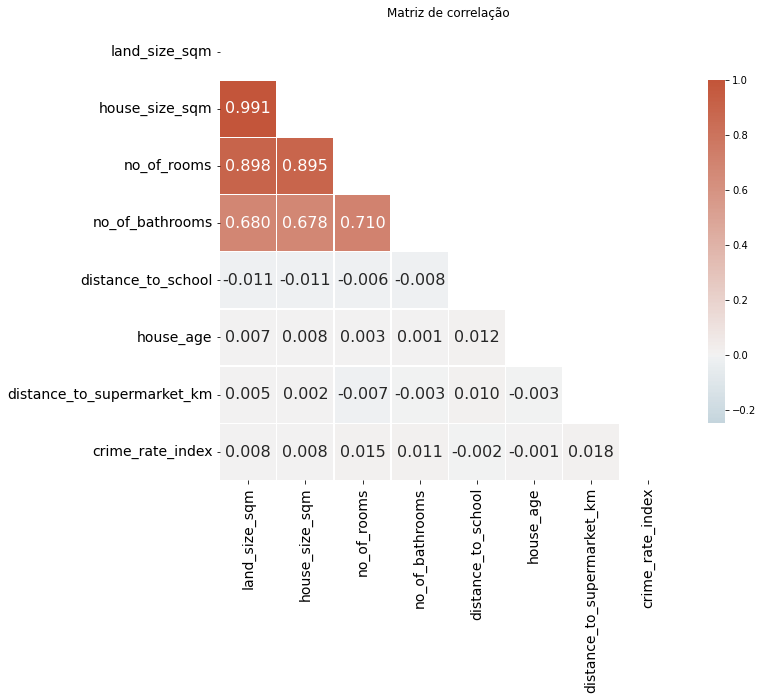

In [11]:
casas_pca = casas.drop("property_value",axis=1)
corr = casas_pca.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(casas_pca.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

##Teste de Bartlett

In [12]:
bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 31857.45566643539
p-value : 0.0


##PCA

Definindo a PCA (procedimento preliminar)

In [13]:
fa = FactorAnalyzer()
fa.fit(casas_pca)

FactorAnalyzer(rotation_kwargs={})

Obtendo os Eigenvalues (autovalores)

In [14]:
ev, v = fa.get_eigenvalues()
print(ev)# Temos 8 autovalores para este exemplo, pois são 8 variáveis

[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


Critério de Kaiser : 
* Verificar autovalores com valores maiores que 1
* Existem 3 componentes acima de 1

Parametrizando a PCA para dois fatores (autovalores > 1)


In [16]:
fa.set_params(n_factors = 3, method = 'principal', rotation = None)
fa.fit(casas_pca)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

Eigenvalues, variâncias e variâncias acumulada


In [17]:
eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   3.440788   0.430098             0.430098
Fator 2   1.019896   0.127487             0.557585
Fator 3   1.011559   0.126445             0.684030


Determinando as cargas fatoriais

In [18]:
cargas_fatores = fa.loadings_
tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns
tabela_cargas
print(tabela_cargas)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.969318  0.000670  0.003416
house_size_sqm              0.967866 -0.000800  0.005045
no_of_rooms                 0.948705 -0.002536  0.002939
no_of_bathrooms             0.814810 -0.002453 -0.002870
distance_to_school         -0.013787  0.349991  0.642441
house_age                   0.007448  0.080374  0.692606
distance_to_supermarket_km -0.000987  0.720297 -0.113461
crime_rate_index            0.015520  0.610001 -0.325882


Determinando as comunalidades

In [19]:
comunalidades = fa.get_communalities()
tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns
tabela_comunalidades
print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.939590
house_size_sqm                   0.936791
no_of_rooms                      0.900057
no_of_bathrooms                  0.663930
distance_to_school               0.535414
house_age                        0.486218
distance_to_supermarket_km       0.531702
crime_rate_index                 0.478541


Resultados dos fatores para as observações do dataset (predict)

In [20]:
predict_fatores= pd.DataFrame(fa.transform(casas_pca))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]
print(predict_fatores)

       Fator 1   Fator 2   Fator 3
0    -0.763931  0.409791 -0.005071
1    -0.286895 -0.720208 -0.507750
2    -0.132644  0.413418  1.559236
3    -0.734837 -0.181887 -0.025554
4    -0.850848 -1.858475  0.369112
...        ...       ...       ...
4949  0.378174  0.565149  0.528827
4950  0.149131  0.216979  0.269514
4951 -0.533601  0.683343 -0.789444
4952 -1.044735 -0.113250 -1.662989
4953  3.523850 -1.146633 -1.754357

[4954 rows x 3 columns]


Adicionando ao dataset 


In [22]:
casas = pd.concat([casas.reset_index(drop=True), predict_fatores], axis=1)
casas.head(5)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Fator 1,Fator 2,Fator 3
0,201,177,3,1,3.3,10,6.8,0.90,165432,-0.763931,0.409791,-0.005071
1,196,182,4,3,1.2,11,4.1,1.42,187043,-0.286895,-0.720208,-0.507750
2,198,182,4,4,5.9,20,2.1,4.12,148658,-0.132644,0.413418,1.559236
3,178,166,2,3,5.9,5,0.7,4.36,123785,-0.734837,-0.181887,-0.025554
4,183,165,3,1,3.8,8,0.7,0.42,156470,-0.850848,-1.858475,0.369112


Identificando os scores fatoriais

In [23]:
scores = fa.weights_
tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns
tabela_scores
print(tabela_scores)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.281714  0.000657  0.003377
house_size_sqm              0.281292 -0.000784  0.004987
no_of_rooms                 0.275723 -0.002487  0.002906
no_of_bathrooms             0.236809 -0.002405 -0.002837
distance_to_school         -0.004007  0.343163  0.635100
house_age                   0.002165  0.078806  0.684691
distance_to_supermarket_km -0.000287  0.706245 -0.112164
crime_rate_index            0.004510  0.598101 -0.322158


Correlação entre os fatores
*  A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)

In [24]:
corr_fator = pg.rcorr(casas[['Fator 1','Fator 2','Fator 3']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(corr_fator)

        Fator 1 Fator 2 Fator 3
Fator 1       -                
Fator 2     0.0       -        
Fator 3     0.0     0.0       -


##Criando um ranking

In [25]:
casas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    casas['Ranking'] = casas['Ranking'] + casas[tabela_eigen.index[index]]*variancia
    
print(casas)

      land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
0               201             177            3                1   
1               196             182            4                3   
2               198             182            4                4   
3               178             166            2                3   
4               183             165            3                1   
...             ...             ...          ...              ...   
4949            297             261            4                4   
4950            302             282            4                2   
4951            153             147            3                4   
4952            180             158            2                1   
4953            695             619            8                6   

      distance_to_school  house_age  distance_to_supermarket_km  \
0                    3.3         10                         6.8   
1                    1.2         11  

Gráfico da variância acumulada dos componentes principais

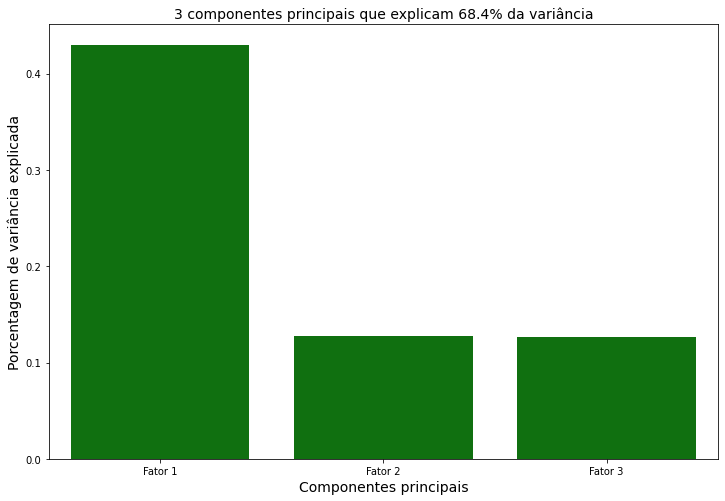

In [26]:

plt.figure(figsize=(12,8))
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, color='green')
plt.xlabel("Componentes principais", fontsize=14)
plt.ylabel("Porcentagem de variância explicada", fontsize=14)
plt.show()

In [31]:
import plotly.express as px
tabela_cargas_chart = tabela_cargas.reset_index()
tabela_cargas_chart.columns=['Variável','Fator 1','Fator 2','Fator 3']
df = px.data.iris()
fig = px.scatter_3d(tabela_cargas_chart, x='Fator 1', y='Fator 2', z='Fator 3',
              color='Variável')
fig.show()